<a href="https://colab.research.google.com/github/RandaAlsubaie/ny/blob/main/Copy_of_Task_1_Artificial_Neural_Networks_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [1]:
 !kaggle datasets download -d khaledzsa/bus-breakdown-and-delays
!unzip bus-breakdown-and-delays.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays
License(s): unknown
  0% 0.00/4.75M [00:00<?, ?B/s]
100% 4.75M/4.75M [00:00<00:00, 79.2MB/s]
Archive:  bus-breakdown-and-delays.zip
  inflating: Bus_Breakdown_and_Delays.csv  


## Importing Libraries

In [113]:
import pandas as pd
import numpy as np
import  tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [114]:
df=pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')

In [115]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [117]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Busbreakdown_ID,147972.0,1.287779e+06,43243.382164,1212681.0,1250437.75,1287843.5,1325191.25,1362605.0
Number_Of_Students_On_The_Bus,147972.0,3.590071e+00,55.365859,0.0,0.00,0.0,4.00,9007.0


In [118]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [119]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


array([[<Axes: title={'center': 'Breakdown'}>,
        <Axes: title={'center': 'Running Late'}>, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

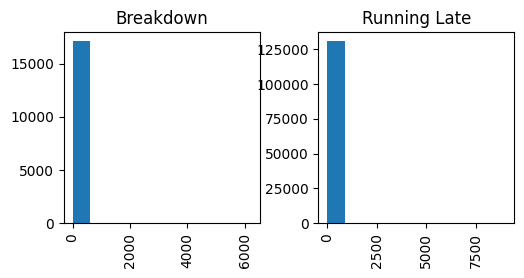

In [120]:
df['Number_Of_Students_On_The_Bus'].hist(by=df['Breakdown_or_Running_Late'],layout=(4,4),figsize=(12,14))

array([[<Axes: title={'center': 'Breakdown'}>,
        <Axes: title={'center': 'Running Late'}>, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

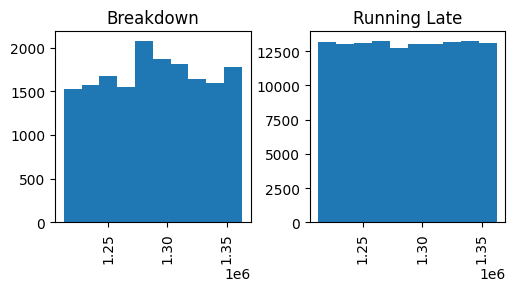

In [121]:
df['Busbreakdown_ID'].hist(by=df['Breakdown_or_Running_Late'],layout=(4,4),figsize=(12,14))

<Axes: xlabel='Bus_No', ylabel='count'>

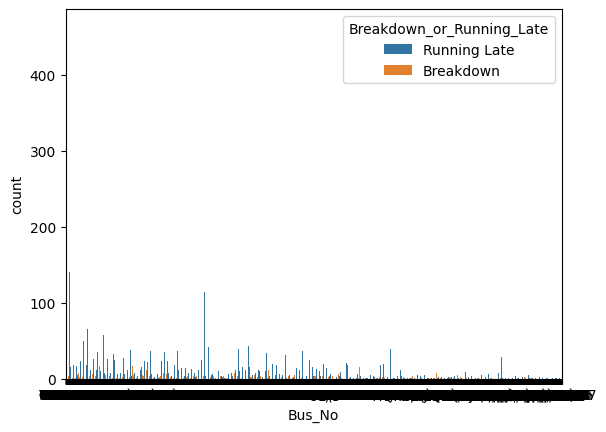

In [122]:
sns.countplot(data=df,x='Bus_No',hue='Breakdown_or_Running_Late')

<Axes: xlabel='Reason', ylabel='count'>

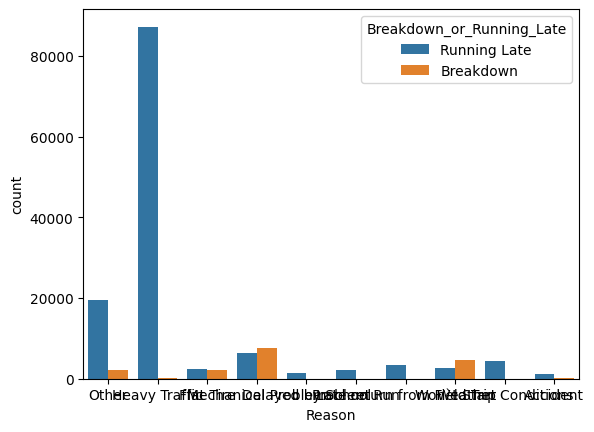

In [123]:
sns.countplot(data=df,x='Reason',hue='Breakdown_or_Running_Late')

<Axes: xlabel='Run_Type', ylabel='count'>

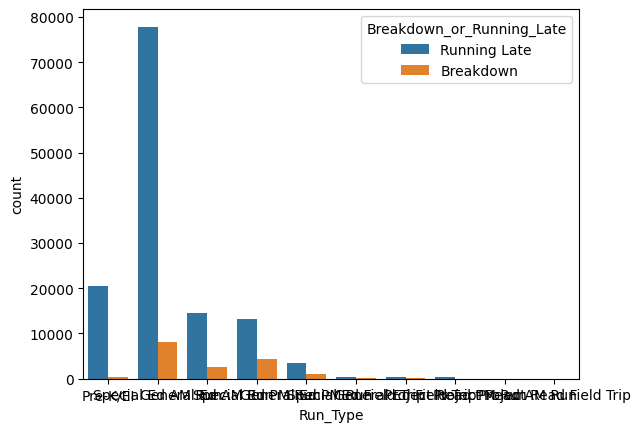

In [124]:
sns.countplot(data=df,x='Run_Type',hue='Breakdown_or_Running_Late')

<Axes: xlabel='Route_Number', ylabel='count'>

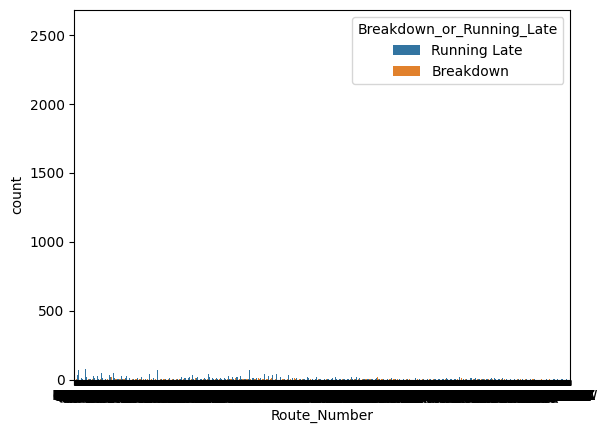

In [125]:
sns.countplot(data=df,x='Route_Number',hue='Breakdown_or_Running_Late')

In [126]:
df.sample(5)

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
132156,2016-2017,1353814,Special Ed PM Run,GC0026,X514,Late return from Field Trip,11012,05/30/2017 01:20:00 PM,05/30/2017 01:25:00 PM,Bronx,...,60-120MINS,0,Yes,Yes,Yes,05/30/2017 01:25:00 PM,90325396,05/30/2017 01:40:04 PM,Running Late,School-Age
28943,2015-2016,1248904,Pre-K/EI,3073,3107AA,Other,C117,02/05/2016 08:00:00 AM,02/05/2016 08:14:00 AM,Brooklyn,...,30 MINS,7,Yes,Yes,Yes,02/05/2016 08:14:00 AM,NaN,02/05/2016 08:14:14 AM,Running Late,Pre-K
75155,2016-2017,1295878,Pre-K/EI,12,3,Heavy Traffic,C814,10/28/2016 07:26:00 AM,10/28/2016 07:28:00 AM,Bronx,...,30 minutes,6,Yes,Yes,No,10/28/2016 07:28:00 AM,NaN,10/28/2016 07:28:48 AM,Running Late,Pre-K
70195,2016-2017,1290889,Special Ed PM Run,FR2402,R819,Mechanical Problem,31905,10/06/2016 04:00:00 PM,10/06/2016 04:27:00 PM,Staten Island,...,NaN,1,Yes,Yes,Yes,10/06/2016 04:27:00 PM,NaN,10/06/2016 04:27:00 PM,Breakdown,School-Age
98115,2016-2017,1319123,Pre-K/EI,9348,6,Heavy Traffic,C814,01/27/2017 07:32:00 AM,01/27/2017 07:33:00 AM,Bronx,...,30 minutes,5,Yes,Yes,No,01/27/2017 07:33:00 AM,NaN,01/27/2017 07:33:28 AM,Running Late,Pre-K


<Axes: >

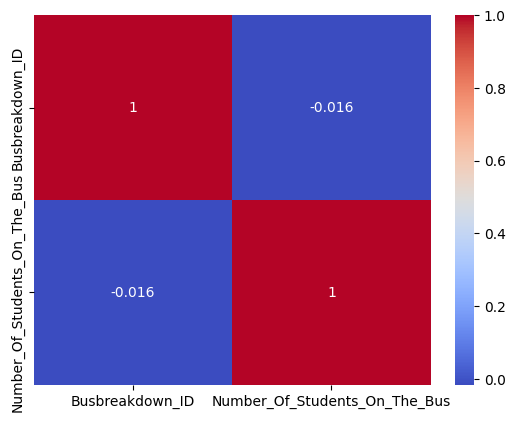

In [127]:
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm')

<Axes: ylabel='How_Long_Delayed'>

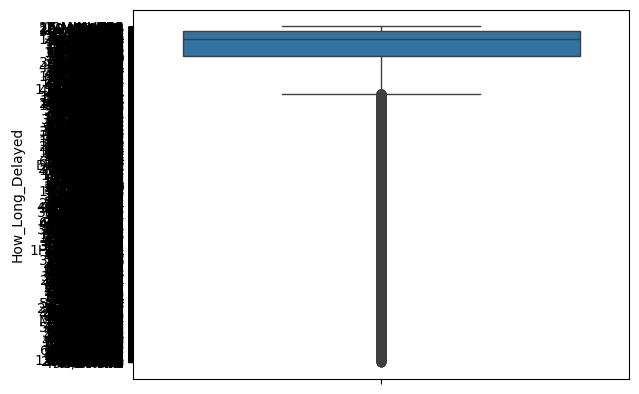

In [128]:
sns.boxplot(df['How_Long_Delayed'])

In [129]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [6]:
#find_outliers_IQR('How_Long_Delayed')

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [38]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [39]:
#since these col have a lot of nulls dropping them to not effect my pred
df=df.drop(columns='How_Long_Delayed',axis=1)
df=df.drop(columns='Incident_Number',axis=1)
df=df.drop(columns='Boro',axis=1)
######
df=df.dropna()


In [40]:
#col that have a small number of nulls filling it will be better approch
df=df.fillna(method='ffill')

<ipython-input-40-518353618dcc>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=df.fillna(method='ffill')


In [41]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Bus_Company_Name,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147693 entries, 0 to 147971
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147693 non-null  object
 1   Busbreakdown_ID                  147693 non-null  int64 
 2   Run_Type                         147693 non-null  object
 3   Bus_No                           147693 non-null  object
 4   Route_Number                     147693 non-null  object
 5   Reason                           147693 non-null  object
 6   Schools_Serviced                 147693 non-null  object
 7   Occurred_On                      147693 non-null  object
 8   Created_On                       147693 non-null  object
 9   Bus_Company_Name                 147693 non-null  object
 10  Number_Of_Students_On_The_Bus    147693 non-null  int64 
 11  Has_Contractor_Notified_Schools  147693 non-null  object
 12  Has_Contractor_Notifi

In [80]:
#choosing col that i need ,'Reason','Breakdown_or_Running_Late','Route_Number'],
df1=df['Run_Type']
df1=df['Reason']
df1=df['Breakdown_or_Running_Late']
df1=df['Route_Number']


In [81]:
label_encoding_cols = ['Breakdown_or_Running_Late','Reason','Route_Number']
one_hot_encoding_cols = ['Run_Type']

In [82]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

ohe_encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = ohe_encoder.fit_transform(df[one_hot_encoding_cols])

one_hot_data = pd.DataFrame(one_hot_encoded, columns=ohe_encoder.get_feature_names_out(one_hot_encoding_cols))

df_encoded = pd.concat([df, one_hot_data], axis=1)

df_encoded = df_encoded.drop(one_hot_encoding_cols, axis=1)

df1 = df_encoded


In [83]:
label_encoder = LabelEncoder()

for col in label_encoding_cols:
    df1[col] = label_encoder.fit_transform(df1[col])

df1.head()

,School_Year,Busbreakdown_ID,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Bus_Company_Name,Number_Of_Students_On_The_Bus,...,Run_Type_General Ed AM Run,Run_Type_General Ed Field Trip,Run_Type_General Ed PM Run,Run_Type_Pre-K/EI,Run_Type_Project Read AM Run,Run_Type_Project Read Field Trip,Run_Type_Project Read PM Run,Run_Type_Special Ed AM Run,Run_Type_Special Ed Field Trip,Run_Type_Special Ed PM Run
0,2015-2016,1224901.0,811,77,6,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,"G.V.C., LTD.",5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-2016,1225098.0,9302,77,3,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,"G.V.C., LTD.",3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-2016,1215800.0,358,209,3,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,"G.V.C., LTD.",12.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-2016,1215511.0,331,209,6,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,"G.V.C., LTD.",11.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-2016,1215828.0,332,209,6,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,"G.V.C., LTD.",12.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
df1=df1.drop(columns='Busbreakdown_ID',axis=1)
df1=df1.drop(columns='Bus_No',axis=1)
df1=df1.drop(columns='School_Year',axis=1)
df1=df1.drop(columns='Schools_Serviced',axis=1)
df1=df1.drop(columns='Occurred_On',axis=1)
df1=df1.drop(columns='Created_On',axis=1)
df1=df1.drop(columns='Bus_Company_Name',axis=1)
df1=df1.drop(columns='Has_Contractor_Notified_Schools',axis=1)




df1.head()

,Route_Number,Reason,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK,Run_Type_General Ed AM Run,Run_Type_General Ed Field Trip,Run_Type_General Ed PM Run,Run_Type_Pre-K/EI,Run_Type_Project Read AM Run,Run_Type_Project Read Field Trip,Run_Type_Project Read PM Run,Run_Type_Special Ed AM Run,Run_Type_Special Ed Field Trip,Run_Type_Special Ed PM Run
0,77,6,5.0,Yes,No,10/26/2015 08:40:00 AM,10/26/2015 08:40:39 AM,1,Pre-K,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,77,3,3.0,Yes,No,10/27/2015 07:11:00 AM,10/27/2015 07:11:22 AM,1,Pre-K,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,209,3,12.0,Yes,Yes,09/18/2015 07:38:00 AM,09/18/2015 07:38:44 AM,1,Pre-K,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,209,6,11.0,Yes,Yes,09/17/2015 08:12:00 AM,09/17/2015 08:12:08 AM,1,Pre-K,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,209,6,12.0,Yes,No,09/18/2015 07:45:00 AM,09/18/2015 07:56:40 AM,1,Pre-K,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
df1=df1.drop(columns='Informed_On',axis=1)
df1=df1.drop(columns='Last_Updated_On',axis=1)
df1=df1.drop(columns='Has_Contractor_Notified_Parents',axis=1)
df1=df1.drop(columns='Have_You_Alerted_OPT',axis=1)
df1=df1.drop(columns='School_Age_or_PreK',axis=1)


df1.head()



,Route_Number,Reason,Number_Of_Students_On_The_Bus,Breakdown_or_Running_Late,Run_Type_General Ed AM Run,Run_Type_General Ed Field Trip,Run_Type_General Ed PM Run,Run_Type_Pre-K/EI,Run_Type_Project Read AM Run,Run_Type_Project Read Field Trip,Run_Type_Project Read PM Run,Run_Type_Special Ed AM Run,Run_Type_Special Ed Field Trip,Run_Type_Special Ed PM Run
0,77,6,5.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,77,3,3.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,209,3,12.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,209,6,11.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,209,6,12.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147972 entries, 0 to 147692
Data columns (total 14 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Route_Number                      147972 non-null  int64  
 1   Reason                            147972 non-null  int64  
 2   Number_Of_Students_On_The_Bus     147693 non-null  float64
 3   Breakdown_or_Running_Late         147972 non-null  int64  
 4   Run_Type_General Ed AM Run        147693 non-null  float64
 5   Run_Type_General Ed Field Trip    147693 non-null  float64
 6   Run_Type_General Ed PM Run        147693 non-null  float64
 7   Run_Type_Pre-K/EI                 147693 non-null  float64
 8   Run_Type_Project Read AM Run      147693 non-null  float64
 9   Run_Type_Project Read Field Trip  147693 non-null  float64
 10  Run_Type_Project Read PM Run      147693 non-null  float64
 11  Run_Type_Special Ed AM Run        147693 non-null  float6

In [87]:
df1['Breakdown_or_Running_Late'].value_counts()
#we can see imbalnce data

,count
Breakdown_or_Running_Late,
1,130618
0,17075
2,279


In [78]:
#df1=df1['Breakdown_or_Running_Late'].replace('NaN','')

In [88]:
df1.head()

,Route_Number,Reason,Number_Of_Students_On_The_Bus,Breakdown_or_Running_Late,Run_Type_General Ed AM Run,Run_Type_General Ed Field Trip,Run_Type_General Ed PM Run,Run_Type_Pre-K/EI,Run_Type_Project Read AM Run,Run_Type_Project Read Field Trip,Run_Type_Project Read PM Run,Run_Type_Special Ed AM Run,Run_Type_Special Ed Field Trip,Run_Type_Special Ed PM Run
0,77,6,5.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,77,3,3.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,209,3,12.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,209,6,11.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,209,6,12.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
df1.dropna()

,Route_Number,Reason,Number_Of_Students_On_The_Bus,Breakdown_or_Running_Late,Run_Type_General Ed AM Run,Run_Type_General Ed Field Trip,Run_Type_General Ed PM Run,Run_Type_Pre-K/EI,Run_Type_Project Read AM Run,Run_Type_Project Read Field Trip,Run_Type_Project Read PM Run,Run_Type_Special Ed AM Run,Run_Type_Special Ed Field Trip,Run_Type_Special Ed PM Run
0,77,6,5.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,77,3,3.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,209,3,12.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,209,6,11.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,209,6,12.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147687,3529,2,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
147688,106,3,1.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
147689,288,6,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
147690,147,0,3.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [90]:
df1.head()

,Route_Number,Reason,Number_Of_Students_On_The_Bus,Breakdown_or_Running_Late,Run_Type_General Ed AM Run,Run_Type_General Ed Field Trip,Run_Type_General Ed PM Run,Run_Type_Pre-K/EI,Run_Type_Project Read AM Run,Run_Type_Project Read Field Trip,Run_Type_Project Read PM Run,Run_Type_Special Ed AM Run,Run_Type_Special Ed Field Trip,Run_Type_Special Ed PM Run
0,77,6,5.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,77,3,3.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,209,3,12.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,209,6,11.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,209,6,12.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

x= df.drop('Breakdown_or_Running_Late', axis=1)
y = df['Breakdown_or_Running_Late']

rus = RandomUnderSampler(sampling_strategy ='not minority', random_state=42)
x_resampled, y_resampled = rus.fit_resample(x, y)

print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({0: 17075, 1: 17075})


In [130]:
df.duplicated().sum()
#no need to drop any thing

0

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [132]:
df1.shape

(147972, 14)

In [131]:
x=df1.drop(columns='Breakdown_or_Running_Late',axis=1)
y=df1['Breakdown_or_Running_Late']
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

In [133]:
print(x_train.shape)

(27320, 17)


In [145]:
df1.head()

,Route_Number,Reason,Number_Of_Students_On_The_Bus,Breakdown_or_Running_Late,Run_Type_General Ed AM Run,Run_Type_General Ed Field Trip,Run_Type_General Ed PM Run,Run_Type_Pre-K/EI,Run_Type_Project Read AM Run,Run_Type_Project Read Field Trip,Run_Type_Project Read PM Run,Run_Type_Special Ed AM Run,Run_Type_Special Ed Field Trip,Run_Type_Special Ed PM Run
0,77,6,5.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,77,3,3.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,209,3,12.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,209,6,11.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,209,6,12.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()
scaler.fit_transform(df1)

array([[-0.72081944,  1.5       ,  1.25      , ..., -1.        ,
         0.        ,  0.        ],
       [-0.72081944,  0.        ,  0.75      , ..., -1.        ,
         0.        ,  0.        ],
       [-0.69985707,  0.        ,  3.        , ..., -1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.0578053 ,  3.5       ,         nan, ..., -1.        ,
         0.        ,  0.        ],
       [ 1.0578053 ,  3.5       ,         nan, ..., -1.        ,
         0.        ,  0.        ],
       [ 1.0578053 ,  3.5       ,         nan, ..., -1.        ,
         0.        ,  0.        ]])

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [147]:
print(x_train.shape)

(27320, 17)


In [148]:
model=Sequential()
model.add(Dense(units=6, input_dim=x_train.shape[1], kernel_initializer='uniform',activation='relu'))

model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [149]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [150]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 6)                   │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │              28 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the ANN model using the training data.

In [151]:
history=model.fit(x_train, y_train, batch_size=10, epochs=10, validation_split=0.2)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [111]:
model.evaluate(x_test,y_test)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [ ]:
y_pred=model.predict(x_test)

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

In [ ]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epoch_count = range(1, 100 + 1)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, validation_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss")
plt.show()
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, validation_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy")
plt.show()


## Save the Model
Save the trained model for submission.

In [ ]:
model.save('my_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

i use encoding since to chaange cat to numbers to make it easier to work with it i choose these layers and neurons to make the prefonce better when i added more hidden layer it increace the accurssy, i choose batch size 10 beacuse i want the model to learn slowly and taked small sample of data and my task was  binary classsifaction so i use binary crossntropy

[link text](https://)### Answer Here:

> Add blockquote

> Add blockquote



